# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [215]:
# Import necessary libraries
# *NOTE* 
import pandas as pd
import numpy as np
import requests 
import os
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
from timeit import default_timer as timer
%matplotlib inline 

In [216]:
# Create dataframe from 'twitter-archive-enhanced.csv'
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [217]:
# Download 'image-predictions.tsv' and create a dataframe called 'df_image'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
df_image = pd.read_csv('image-predictions.tsv', sep = '\t')


# https://www.tutorialspoint.com/downloading-files-from-web-using-python
# Used this tutorial as a reference/to supplement course materials

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
>
> NOTE: The code below does not need to run, it was provided by Udacity instructors for those who do not want to create a Twitter/X account

In [218]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# !!! NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor !!!
# Tweet IDs for which to gather additional data via Twitter's API 
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

NameError: name 'df_1' is not defined

In [219]:
# Create list to store extracted data
json_data = []

# Loop through the JSON data from 'tweet-json.txt' and extract the three necessary columns and 'full_text'
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet_data = json.loads(line)
        tweet_id = tweet_data['id']
        retweet_count = tweet_data['retweet_count']
        favorite_count = tweet_data['favorite_count']
        json_data.append({'id':tweet_id, 'retweet_count':retweet_count, 'favorite_count':favorite_count})

# Create the dataframe 'df_json' that holds the extracted data        
df_json = pd.DataFrame(json_data)

# 'https://www.youtube.com/watch?v=SNv7E-cXCu0'
# I used this video to supplement the course materials about how to parse 'json' files

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing df_archive

In [220]:
df_archive.shape

(2356, 17)

In [221]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [222]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [223]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [224]:
# See how many duplicates exist
df_archive.duplicated().sum()

0

In [225]:
# Get a sense of how many null values exist
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

In [226]:
# Create a list of names to view to see if any problems exist
names = df_archive.name.value_counts(dropna=False)
pd.set_option('display.max_rows', None)
print(names)

name
NaN               745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Penny              10
Lola               10
Winston             9
Bo                  9
Sadie               8
the                 8
Daisy               7
Buddy               7
Toby                7
an                  7
Bailey              7
Leo                 6
Oscar               6
Stanley             6
Rusty               6
Bella               6
Dave                6
Jack                6
Koda                6
Scout               6
Jax                 6
Milo                6
Louis               5
Phil                5
Sammy               5
Gus                 5
Chester             5
Alfie               5
Sunny               5
Bentley             5
very                5
Oakley              5
Finn                5
George              5
Larry               5
Clarence            4
Loki                4
Walter              4
Reggi

In [227]:
# How many times 'doggo' appears
df_archive.doggo.value_counts()

doggo
doggo    97
Name: count, dtype: int64

In [228]:
# How many times 'floofer' appears
df_archive.floofer.value_counts()

floofer
floofer    10
Name: count, dtype: int64

In [229]:
# How many times 'pupper' appears
df_archive.pupper.value_counts()

pupper
pupper    257
Name: count, dtype: int64

In [230]:
# How many times 'puppo' appears
df_archive.puppo.value_counts()

puppo
puppo    30
Name: count, dtype: int64

In [231]:
# See how many different denominators exist and their value counts
df_archive.rating_denominator.value_counts()

rating_denominator
10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: count, dtype: int64

In [232]:
# See how the different numerators that exist and their value counts
df_archive.rating_numerator.value_counts()

rating_numerator
12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: count, dtype: int64

In [233]:
# Create and view a df that holds rows that have a numerator other than '10'
other_than_10 = df_archive[df_archive['rating_denominator'] != 10]
other_than_10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,NaN,NaN,NaN,NaN,NaN
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,NaN,NaN,NaN,NaN,NaN
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,NaN,NaN,NaN,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,NaN,NaN,NaN
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,NaN,NaN,NaN,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,NaN,NaN,NaN,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,NaN,NaN,NaN,NaN,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,NaN,NaN,NaN,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,NaN,NaN,NaN,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN,NaN,NaN,NaN


### Visusal assessment of df_archive
>
> 1. Retweets need to be removed
>
> 2. Several columns will not be used, therefore need to be removed ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls')
>
> 3. Some dog names are 'non-names', such as 'a', 'an', 'the', etc. Non-names are not capitalized and will be removed.

### Programmatic assessment of df_archive
>
> 4. 'tweet_id' column needs to be converted to 'string' format.
>
> 5. 'timestamp' column needs to be converted to 'datetime' format., and '+0000' needs to be removed from the end of each value.

### Assessing df_image

In [234]:
df_image.shape

(2075, 12)

In [235]:
df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1211,742528092657332225,https://pbs.twimg.com/media/Ck39W0JWUAApgnH.jpg,2,sunglasses,0.900864,False,sunglass,0.040291,False,snorkel,0.009333,False
440,674447403907457024,https://pbs.twimg.com/media/CVweVUfW4AACPwI.jpg,1,Brabancon_griffon,0.409909,True,malinois,0.244649,True,bull_mastiff,0.074819,True
1820,834458053273591808,https://pbs.twimg.com/media/C5SXK89XUAQg7GX.jpg,1,Rhodesian_ridgeback,0.468619,True,whippet,0.177531,True,redbone,0.106552,True
454,674764817387900928,https://pbs.twimg.com/media/CV0_BSuWIAIvE9k.jpg,2,Samoyed,0.634695,True,Arctic_fox,0.309853,False,kuvasz,0.019641,True
1594,798697898615730177,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True
361,672828477930868736,https://pbs.twimg.com/media/CVZd7ttWcAEs2wP.jpg,1,sandbar,0.118154,False,stingray,0.075915,False,seashore,0.075125,False
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
437,674416750885273600,https://pbs.twimg.com/media/CVwCdCFW4AUHY4D.jpg,1,Chihuahua,0.287201,True,Boston_bull,0.250920,True,whippet,0.141012,True
708,685198997565345792,https://pbs.twimg.com/media/CYJQxvJW8AAkkws.jpg,1,dishwasher,0.888829,False,stove,0.013411,False,Old_English_sheepdog,0.009671,True
638,681281657291280384,https://pbs.twimg.com/media/CXRmDfWWMAADCdc.jpg,1,Saint_Bernard,0.998830,True,Pekinese,0.000391,True,Great_Pyrenees,0.000224,True


In [236]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [237]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [238]:
df_image.duplicated().sum()

0

In [239]:
df_image.p1.value_counts()

p1
golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
Siberian_husky                     20
German_shepherd                    20
Staffordshire_bullterrier          20
Cardigan                           19
web_site                           19
Eskimo_dog                         18
Maltese_dog                        18
Shetland_sheepdog                  18
teddy                              18
beagle                             18
Lakeland_terrier                   17
Rottweile

In [240]:
df_image.tweet_id.duplicated().sum()

0

In [241]:
# if 'jpg_url' is duplicated, perhaps it is a retweet. lets check
df_image.jpg_url.duplicated().sum()

66

In [242]:
# See the rows where the 'jpg_url' is duplicated
df_image[df_image['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [243]:
# View the duplicate URLs, they can be explored with the clickable links
duplicate_jpg = df_image.groupby('jpg_url').size()
duplicates = duplicate_jpg[duplicate_jpg >1]
duplicates

jpg_url
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg    2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                                            2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg                                            2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                                            2
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                                            2
https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                            2
https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg               

In [244]:
df_image[df_image['jpg_url'] == 'https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


### Visual assessment of df_image 
>
> 1. We will only use rows where columns  'p1_dog', 'p2_dog', and 'p3_dog' are not 'False', as the image prediction algorithm suggests these are NOT dogs. We will then filter the dataframe and keep only the values that correspond to the highest confidence level
>
> 2. There are duplicates in the 'jpg_url' column, indicating they are possibly retweets.
>
> 3. We will get rid of unnecessary columns for our analysis
>
> 4. The dog breeds need to be displayed in a standard, consistent format.
>
### Programmatic assessment of df_image
>
> 5. The dataframe contains duplicates in the 'jpg_url' column, and are likely retweets and should be removed.

### Assessing df_json

In [245]:
df_json.shape

(2354, 3)

In [246]:
df_json.sample(10)

,id,retweet_count,favorite_count
1350,703774238772166656,526,2020
921,755955933503782912,3285,8092
1331,705442520700944385,1859,4877
1707,680609293079592961,816,2906
406,823699002998870016,2772,13826
1959,673359818736984064,728,1558
268,841320156043304961,6080,21402
2185,668979806671884288,382,842
1090,737322739594330112,907,3953
492,813202720496779264,2090,10192


In [247]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [248]:
df_json.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [249]:
df_json.duplicated().sum()

0

### Visual assessment of df_json
>
> 1. rename 'id' column 'tweet_id'
>

### Quality issues

#### df_archive
>
>1.  Retweets need to be removed
>
>2.  Several columns will not be used, therefore need to be removed ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls')
>
>3.  Some dog names are 'non-names', such as 'a', 'an', 'the', etc. Non-names are not capitalized and will be removed.
>
>4.  'tweet_id' column needs to be converted to 'string' format.
>
>5.  'timestamp' column needs to be converted to 'datetime' format., and '+0000' needs to be removed from the end of each value.
>
#### df_image
>
>6.  We will only use rows where columns  'p1_dog', 'p2_dog', and 'p3_dog' are not 'False', as the image prediction algorithm suggests these are NOT dogs.
>
>7. We will keep only the dog breed that was guessed with the highest confidence level. We will place these values in a column called 'dog_breed'.
>
>8. Next we will drop unnecessary columns from df_image_clean.
>
>9. The dog breeds need to be displayed in a standard, consistent format (we will use snake_case).
>
>10.  The dataframe contains duplicates in the 'jpg_url' column, and are likely retweets and should be removed.
>
#### df_json
>
>11.  The 'id' column needs to be renamed 'tweet_id'.
>
>12.  The new 'tweet_id' data type needs to be converted to string from int.

### Tidiness issues
>
>1.  Four columns, doggo, floofer, puppo and pupper need to be one column, making the values ‘doggo’, ‘floofer’, ‘puppo’, and ‘pupper’ categorical values.
>
>2.  All three tables need to be combined into one master table. 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [250]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_json_clean = df_json.copy()

### Issue #1:
> Remove all retweets and replies. 

#### Define:
>  We will keep only original tweets. If the columns 'retweeted_status_id' and 'in_reply_to_status_id' are NOT null, they will be filtered out.

#### Code

In [251]:
# Keep only rows with null values in the 'retweeted_status_id' column.
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]

# Keep only rows with null values in the 'in_reply_to_status_id' column
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_status_id.isnull()]


#### Test

In [252]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        1494 non-null   object 
 13  doggo                       83 non-nul

### Issue #2:
> Get rid of unnecesary columns for our analysis

#### Define
> Drop columns related to retweets, source, and expanded_urls

#### Code

In [253]:
# Create a list of columns to drop
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                   'source', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                   'expanded_urls']

# Drop the columns contained in the list
df_archive_clean.drop(columns=columns_to_drop, axis=1, inplace=True)


#### Test

In [254]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   text                2097 non-null   object
 3   rating_numerator    2097 non-null   int64 
 4   rating_denominator  2097 non-null   int64 
 5   name                1494 non-null   object
 6   doggo               83 non-null     object
 7   floofer             10 non-null     object
 8   pupper              230 non-null    object
 9   puppo               24 non-null     object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


### Issue #3:
> Some values in the 'name' column are not names, such as 'a', 'an' 'the', 'get', ect. All values that are not actual names are not capitalized. All real names are capitalized.

#### Define
> We will replace all non-capitalized words in the 'name' column with 'None'.

#### Code

In [255]:
# Replace non-capitalized values (these are not actual names) with 'None'
df_archive_clean['name'] = df_archive_clean['name'].apply(lambda x: x if (str(x)[0].isupper() if pd.notnull(x) else True) else 'None')

#### Test

In [256]:
df_archive_clean.name.value_counts()

name
None              104
Lucy               11
Charlie            11
Cooper             10
Oliver             10
Penny               9
Tucker              9
Winston             8
Lola                8
Sadie               8
Toby                7
Daisy               7
Jax                 6
Koda                6
Bella               6
Oscar               6
Bailey              6
Stanley             6
Bo                  6
Scout               5
Rusty               5
Leo                 5
Louis               5
Dave                5
Chester             5
Buddy               5
Milo                5
Bentley             5
Cassie              4
Scooter             4
Jack                4
Reggie              4
Larry               4
Clarence            4
Bear                4
Boomer              4
Clark               4
Dexter              4
Duke                4
Alfie               4
Archie              4
Sophie              4
Finn                4
Brody               4
Oakley              4
Gus  

### Issue #4:
> In df_archive_clean and df_image_clean, the 'tweet_id' column needs to be converted to 'string' format.

#### Define
> Convert column 'tweet_id' in dataframes df_archive_clean and df_image_clean to 'string' data type.

#### Code

In [257]:
# Convert 'tweet_id' data type to 'object'.
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(object)

df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype(object)

#### Test

In [258]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   text                2097 non-null   object
 3   rating_numerator    2097 non-null   int64 
 4   rating_denominator  2097 non-null   int64 
 5   name                1494 non-null   object
 6   doggo               83 non-null     object
 7   floofer             10 non-null     object
 8   pupper              230 non-null    object
 9   puppo               24 non-null     object
dtypes: int64(2), object(8)
memory usage: 180.2+ KB


In [259]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #5:
> The 'timestamp' column has five unnecessary characters ('+0000') after each value. The column is not of the 'datetime' data type.

#### Define
> We need to remove the final five characters ('+0000') from each value in the 'timestamp column. Then we will convert the column to 'datetime' data type.

#### Code

In [260]:
# Strip the final five characters (+0000) from the timestamp values
df_archive_clean['timestamp'] = df_archive_clean['timestamp'].str[:-5]

In [261]:
# Convert 'timestamp' to datetime data type
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

#### Test

In [262]:
df_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,NaN,NaN,NaN


In [263]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   timestamp           2097 non-null   datetime64[ns]
 2   text                2097 non-null   object        
 3   rating_numerator    2097 non-null   int64         
 4   rating_denominator  2097 non-null   int64         
 5   name                1494 non-null   object        
 6   doggo               83 non-null     object        
 7   floofer             10 non-null     object        
 8   pupper              230 non-null    object        
 9   puppo               24 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 180.2+ KB


### Issue #6: 
> Some rows in df_image_clean have data where the prediction algorithm determined that the photo in the row does not contain a dog.

#### Define
> We need to remove all rows where 'p1', 'p2', and 'p3' are all 'False', which means the photo associated with the row is not an image of a dog.

#### Code

In [264]:
# Create a condition to filter df_image_clean.
not_a_dog = (df_image_clean['p1_dog'] == False) & \
            (df_image_clean['p2_dog'] == False) & \
            (df_image_clean['p3_dog'] == False)

# Drop rows where the condition is True
df_image_clean = df_image_clean[~not_a_dog]

#### Test

In [265]:
# Test programmatically if this worked.
len(df_image_clean[not_a_dog])

/var/folders/bf/x15pjvv529b_8tj_93vxbw780000gn/T/ipykernel_1562/2902436842.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df_image_clean[not_a_dog])


0

In [266]:
# Test visually to see if this worked
df_image_clean.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Issue #7:
> We need to only use the dog breed that the prediction algorithm chose with the highest confidence level.

#### Define
> We will create a column called 'dog_breed' and populate it with values from the highest confidence level. 

#### Code

In [267]:
# create a function to select the dog breed with the highest confidence level, 
# and place that value in a new column called dog breed.
def best_guess_breed(row):
    if row['p1_dog']:
        return row['p1']
    elif row['p2_dog']:
        return row['p2']
    elif row['p3_dog']:
        return row['p3']
    else:
        return None 
    
# Adding the selected dog breed to the 'dog_breed' column.    
df_image_clean['dog_breed'] = df_image_clean.apply(best_guess_breed, axis=1)

#### Test

In [268]:
# Visually compare this to the 'test' code used in issue #6.
df_image_clean.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,Samoyed
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,Pembroke
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,Irish_terrier
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,Pomeranian
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,Appenzeller
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Chesapeake_Bay_retriever
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua


### Issue #8:
There are now unnecessary columns in the df_image_clean dataframe.

#### Define
> We will drop the columns we no longer need for our analysis from df_image_clean.

#### Code

In [269]:
# Create a list of columns to drop
columns_to_drop = ['img_num', 'p1', 'p1_conf',
                   'p1_dog', 'p2', 'p2_conf', 'p2_dog',
                   'p3', 'p3_conf', 'p3_dog']

# Drop the columns contained in the list
df_image_clean.drop(columns=columns_to_drop, axis=1, inplace=True)

#### Test

In [270]:
# Visually test
df_image_clean.tail(10)

,tweet_id,jpg_url,dog_breed
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua


### Issue #9.
> There are duplicates in the 'jpg_url' column, indicating that they are possibly retweets.

#### Define 
> We will drop these dupliceate values from the dataframe. 

#### Code

In [271]:
# Remove the duplicates in 'jpg_url'
df_image_clean.drop_duplicates(subset='jpg_url', inplace=True)

#### Test

In [272]:
# Check to see if there are any duplicates
df_image_clean.jpg_url.duplicated().sum()

0

### Issue #10:
> The different dog breeds are not displayed in a consistent format (some are capitalized, some are not). 

#### Define
> We want to display the dog breeds in a standard format, replaceing spaces or hyphens ('-') with underscores ('_'), and have all letters be lowercase.


#### Code

In [273]:
# Replace all uppercase letters with lowercase letter
df_image_clean['dog_breed'] = df_image_clean['dog_breed'].str.lower()

#### Test

In [274]:
df_image_clean.dog_breed.value_counts()

dog_breed
golden_retriever                  158
labrador_retriever                108
pembroke                           95
chihuahua                          91
pug                                63
toy_poodle                         51
chow                               48
samoyed                            42
pomeranian                         42
malamute                           33
french_bulldog                     31
chesapeake_bay_retriever           31
cocker_spaniel                     30
miniature_pinscher                 25
eskimo_dog                         22
cardigan                           21
german_shepherd                    21
staffordshire_bullterrier          21
beagle                             20
shih-tzu                           20
siberian_husky                     20
maltese_dog                        19
kuvasz                             19
shetland_sheepdog                  19
rottweiler                         19
lakeland_terrier                   18
it

### Issue #11:
> The 'id' column of 'df_json_clean' needs to be renamed 'tweet_id'.

#### Define
> We will rename the column 'tweet_id' so the dataframes can be joined using this column.

#### Code

In [275]:
# Rename the 'id' column 'tweet_id'
df_json_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [276]:
df_json_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Issue #12:
> The 'tweet_id' column of df_json_clean needs to be converted to 'object' data type.

#### Define
> Convert 'tweet_id' from 'int64' to 'object' data type.

#### Code

In [277]:
# Convert 'tweet_id' data type to 'object' data type.
df_json_clean['tweet_id'] = df_json_clean['tweet_id'].astype(object)

#### Test

In [278]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


## Tidiness Issues

### Issue #1:
>
> The four columns 'doggo', 'floofer', 'puppo' and 'pupper' need to be combined into one column called 'dog_stage', which will hold categorical data about what stage of life the dog is in. This is not scientific whatsoever:)
> A 'floofer' and 'doggo' would be older than a 'pupper' or 'puppo'.

#### Define
> We will use 'melt()' to combine the columns 'doggo', 'floofer', 'puppo', and 'pupper' into one column. Then we will drop the old columns. 

#### Code

In [279]:
# Combine these columns :
columns_to_merge = ['doggo', 'floofer', 'pupper', 'puppo']

# Create a df called 'df_melted' that holds the data.
df_melted = pd.melt(df_archive_clean, value_vars=columns_to_merge, value_name='dog_stage').dropna()

df_melted.drop('variable', axis=1, inplace=True)

# View info summary
df_melted.info()


<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, 9 to 7158
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dog_stage  347 non-null    object
dtypes: object(1)
memory usage: 5.4+ KB


In [280]:
df_melted.value_counts()

dog_stage
pupper       230
doggo         83
puppo         24
floofer       10
Name: count, dtype: int64

In [281]:
# use 'concat' to merge the two dfs.
df_archive_clean = pd.concat([df_archive_clean, df_melted['dog_stage']], axis = 1)

In [282]:
df_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN,NaN


In [283]:
df_archive_clean['dog_stage'].value_counts()

dog_stage
pupper     230
doggo       83
puppo       24
floofer     10
Name: count, dtype: int64

In [284]:
# Drop the merged columns
columns_to_drop = ['doggo', 'floofer', 'pupper', 'puppo']

df_archive_clean.drop(columns=columns_to_drop, axis=1, inplace=True)

In [287]:
df_archive_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN


### Issue #2:
> We now have three cleaned dataframes that need to be joined together to create a master dataframe from which we will perform our analysis.

#### Define
> Join the three data sets on the 'tweet_id' column to make the master dataframe.

#### Code

In [288]:
# Combine df_archive_clean and df_image_clean, call new df 'df_merged'.
df_merged = pd.merge(df_archive_clean, df_image_clean, on='tweet_id', how='inner')

In [291]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1666 non-null   object        
 1   timestamp           1666 non-null   datetime64[ns]
 2   text                1666 non-null   object        
 3   rating_numerator    1666 non-null   float64       
 4   rating_denominator  1666 non-null   float64       
 5   name                1266 non-null   object        
 6   dog_stage           50 non-null     object        
 7   jpg_url             1666 non-null   object        
 8   dog_breed           1666 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 117.3+ KB


In [292]:
df_merged.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua


In [293]:
df_merged.shape

(1666, 9)

In [294]:
df_merged.isnull().sum()

tweet_id                 0
timestamp                0
text                     0
rating_numerator         0
rating_denominator       0
name                   400
dog_stage             1616
jpg_url                  0
dog_breed                0
dtype: int64

In [295]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [296]:
#Combine df_merged with df_json_clean.
df_merged = pd.merge(df_merged, df_json_clean, on='tweet_id', how='inner')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1666 non-null   object        
 1   timestamp           1666 non-null   datetime64[ns]
 2   text                1666 non-null   object        
 3   rating_numerator    1666 non-null   float64       
 4   rating_denominator  1666 non-null   float64       
 5   name                1266 non-null   object        
 6   dog_stage           50 non-null     object        
 7   jpg_url             1666 non-null   object        
 8   dog_breed           1666 non-null   object        
 9   retweet_count       1666 non-null   int64         
 10  favorite_count      1666 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 143.3+ KB


In [297]:
df_merged.shape

(1666, 11)

In [300]:
df_merged.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,4328,25461


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [298]:
# Save df_merged as 'twitter_archive_master.csv'
df_merged.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**
>
> All analysis and visualization will be performed using df_merged, our cleaned, master dataframe.

> What are the top 10 dog breeds to appear in our dataframe?

In [343]:
# view 10 dog breeds with the most value counts
df_merged['dog_breed'].value_counts().sort_values(ascending=False).head(10)

dog_breed
golden_retriever      156
labrador_retriever    106
pembroke               94
chihuahua              90
pug                    62
toy_poodle             50
chow                   48
samoyed                42
pomeranian             41
malamute               33
Name: count, dtype: int64

> Let's now make a barplot to view the top 5 most retweeted dog breeds.

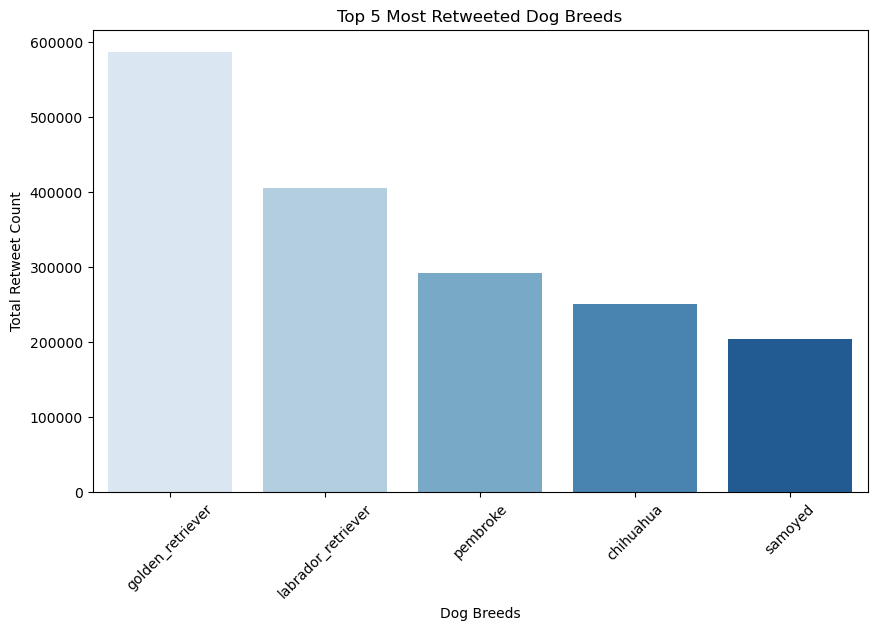

In [344]:
# Group by dog breeds and sum the retweet counts
retweet_counts = df_merged.groupby('dog_breed')['retweet_count'].sum()

# Sort the retweet counts in descending order and select the top 5
top5_retweeted = retweet_counts.sort_values(ascending=False).head(5)

# Plotting the top 5 most retweeted dog breeds using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_retweeted.index, y=top5_retweeted.values, palette='Blues')
plt.xlabel('Dog Breeds')
plt.ylabel('Total Retweet Count')
plt.title('Top 5 Most Retweeted Dog Breeds')
plt.xticks(rotation=45)
# Save the plot as an image file
plt.savefig('5_most_retweeted.png')
plt.show()

> And now, how does it compare to the top five dog breeds with the most favorite counts?

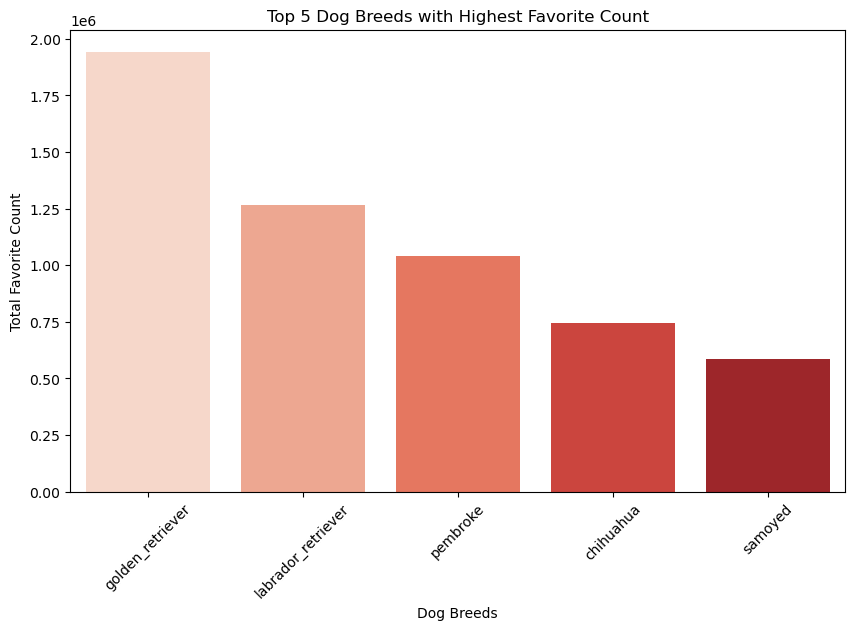

In [346]:
# Group by dog breeds and sum the favorite counts
favorite_counts = df_merged.groupby('dog_breed')['favorite_count'].sum()

# Sort the favorite counts in descending order and select the top 5
top5_favorite = favorite_counts.sort_values(ascending=False).head(5)

# Plotting the top 5 dog breeds with highest favorite count using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_favorite.index, y=top5_favorite.values, palette='Reds')
plt.xlabel('Dog Breeds')
plt.ylabel('Total Favorite Count')
plt.title('Top 5 Dog Breeds with Highest Favorite Count')
plt.xticks(rotation=45)
# Save the plot as an image file
plt.savefig('5_highest_favorite_count.png')
plt.show()

### Insight #1:
>
> The top five breeds with the most retweets and favorite counts are the same. 
>
>The top four breeds are also the top four most common breeds to appear in our dataframe. 
>
>However, the breed with the fifth most retweets and favorite counts, the samoyed, is actually the eighth most common breed to appear in out dataframe. 

> The barplots for retweet counts and favorite counts look very similar. 
>
> Below we will make a scatterplot to see if there is a correlation between retweet counts and favorite counts.

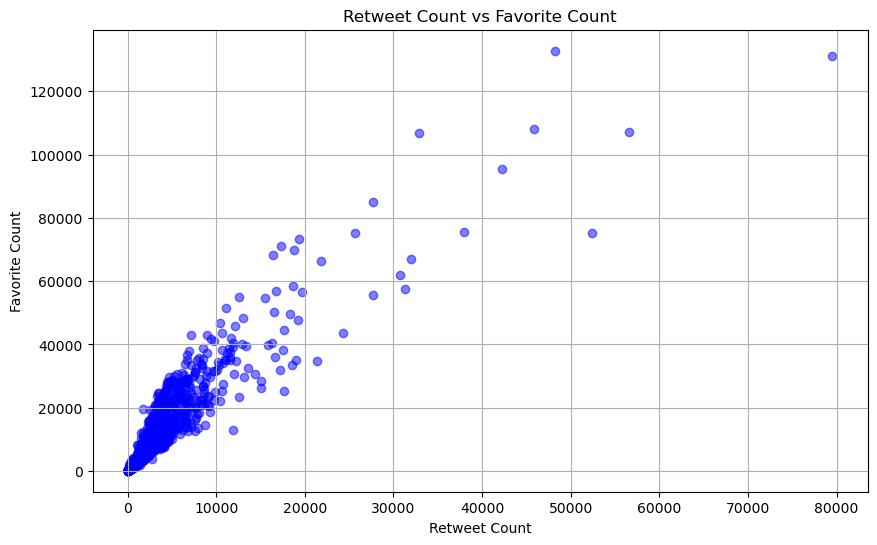

In [345]:
# Scatter plot for 'retweet_count' vs 'favorite_count'
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['retweet_count'], df_merged['favorite_count'], alpha=0.5, color='b')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Retweet Count vs Favorite Count')
plt.grid(True)
# Save the plot as an image file
plt.savefig('retweet_vs_favorite_scatterplot.png')
plt.show()

### Insight #2:
>
> It appears that there is indeed a correlation between retweet counts and favorite counts.

> Continuing with what we discovered with 'Insight #1', lets explore which dog breeds have the highest ratio for total engagement:
>
>(retweets + favorites) / appearances
>

In [342]:
# Group by dog breeds and calculate the sum of favorite counts, sum of retweet counts, and count of appearances
breed_counts = df_merged.groupby('dog_breed').agg({
    'favorite_count': 'sum',
    'retweet_count': 'sum',
    'dog_breed': 'count'
})

# Rename the count column to 'appearance_count'
breed_counts = breed_counts.rename(columns={'dog_breed': 'appearance_count'})

# Calculate the total engagement (favorite_count + retweet_count) for each breed
breed_counts['total_engagement'] = breed_counts['favorite_count'] + breed_counts['retweet_count']

# Calculate the ratio (total_engagement / appearance_count) for each breed
breed_counts['engagement_ratio'] = breed_counts['total_engagement'] / breed_counts['appearance_count']

# Sort the breeds by the ratio in descending order
breed_counts_sorted = breed_counts.sort_values(by='engagement_ratio', ascending=False)

# Display the top 20 breeds based on the ratio of total engagement to appearance count
breed_counts_sorted.head(20)

,favorite_count,retweet_count,appearance_count,total_engagement,engagement_ratio
dog_breed,,,,,
saluki,96240,20535,4,116775,29193.750000
bedlington_terrier,126919,45061,6,171980,28663.333333
french_bulldog,570921,156230,31,727151,23456.483871
afghan_hound,51980,17928,3,69908,23302.666667
bouvier_des_flandres,18032,4479,1,22511,22511.000000
flat-coated_retriever,134333,36162,8,170495,21311.875000
black-and-tan_coonhound,34024,8329,2,42353,21176.500000
irish_water_spaniel,49200,13502,3,62702,20900.666667
english_springer,141383,54016,10,195399,19539.900000


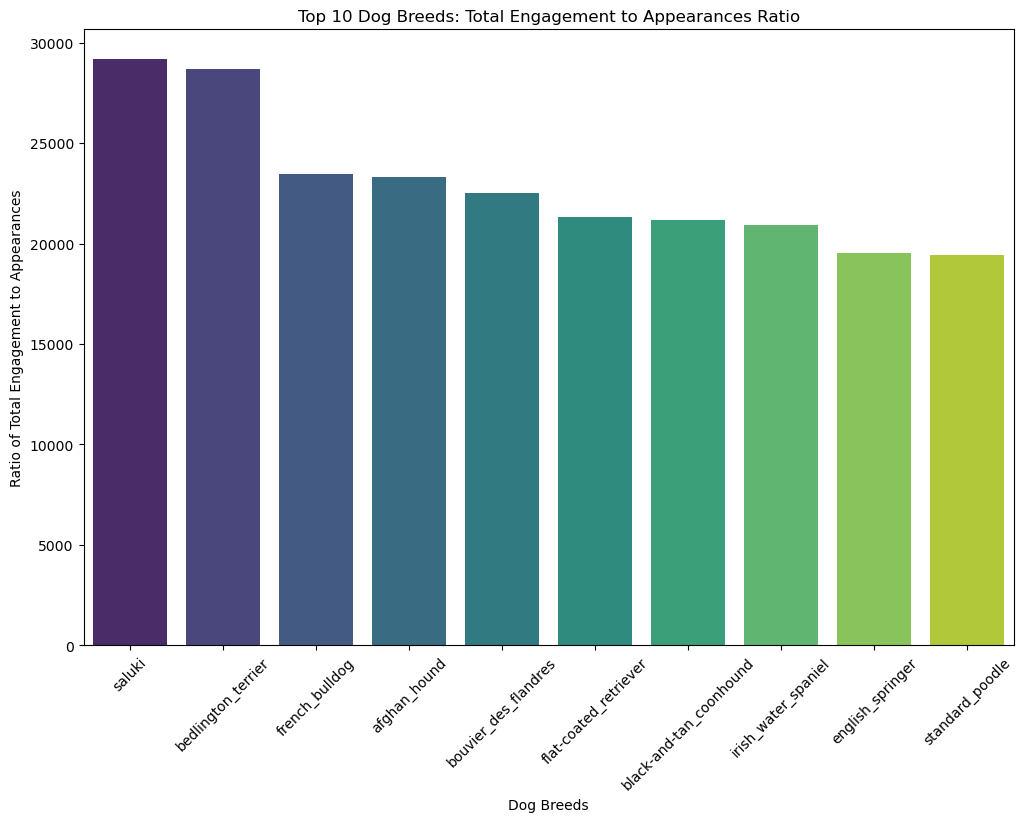

In [347]:
# Plotting the top 10 breeds with the highest ratio of total engagement to appearance count
plt.figure(figsize=(12, 8))
sns.barplot(x=breed_counts_sorted.head(10).index, y=breed_counts_sorted.head(10)['engagement_ratio'], palette='viridis')
plt.xlabel('Dog Breeds')
plt.ylabel('Ratio of Total Engagement to Appearances')
plt.title('Top 10 Dog Breeds: Total Engagement to Appearances Ratio')
plt.xticks(rotation=45)
# Save the plot as an image file
plt.savefig('top_10_engagement_ratio.png')
plt.show()


### Insight #3:
>
> We see a striking difference between this visualization and the barplots of breeds with the most retweets and favorite counts.
>
> We can see that golden retrievers are the most common dog breed that appears in the dataframe, and also holds the most retweet counts and favorite counts. We can contrast this with the saluki, which only appears four times but has almost double the engagement ratio. In fact, none of the dogs with the top 10 highest engagement ratios appear in our charts of breeds with the most favorites or retweets. 
>
>The data shows that there are far less common dogs that have a much higher engagement ratio than the top five dog breeds that have the highest retweet and favorite counts.

In [349]:
df_merged.describe()

,timestamp,rating_numerator,rating_denominator,retweet_count,favorite_count,total_engagement
count,1666,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000
mean,2016-06-05 17:09:11.599639808,11.388355,10.468788,2834.429772,9288.184274,12122.614046
min,2015-11-15 22:32:08,0.000000,2.000000,16.000000,81.000000,97.000000
25%,2015-12-17 18:06:03.249999872,10.000000,10.000000,650.500000,2176.000000,2853.250000
50%,2016-03-27 19:50:21.500000,11.000000,10.000000,1440.500000,4464.000000,5921.000000
75%,2016-10-31 20:45:18.500000,12.000000,10.000000,3261.000000,11734.750000,15018.000000
max,2017-08-01 00:17:27,165.000000,150.000000,79515.000000,132810.000000,210590.000000
std,NaN,7.489081,6.343940,4831.960790,12641.538890,17167.683620
